## Title:Militant operations of Indian Army


In [1]:
##Exploring Traveler data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.dummy import *
from sklearn.tree import *
from sklearn.gaussian_process import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
%pylab inline 
train_file="deaths-in-india-satp-dfe_Final.csv"

data = pd.read_csv(train_file, header = 0,index_col=None)

Populating the interactive namespace from numpy and matplotlib


## Preprocessing 

In [2]:
#dropping _goden as this attribute contains same value for all of its records
data.drop('_golden', axis = 1, inplace = True)
print("Dropping _golden")

#dropping _unit_state as this attribute contains same value for all of its records
data.drop('_unit_state',axis = 1, inplace = True)
print("Dropping _unit_state")

#dropping _trusted_judgments as this attribute contains same value for all of its records
data.drop('_trusted_judgments',axis = 1, inplace = True)
print("Dropping _trusted_judgments")

#dropping _last_judgment_at as this does not help for our prediction
data.drop('_last_judgment_at',axis = 1, inplace = True)
print("Dropping _last_judgment_at")

#dropping _accuracy as this attribute contains same value for all of its records
data.drop('accuracy',axis = 1, inplace = True)
print("Dropping accuracy")

#dropping canddist as this attribute does not help for our prediction
data.drop('canddist',axis = 1, inplace = True)
print("Dropping canddist")

#dropping civilians_gold as this attribute contains same value for all of its records
data.drop('civilians_gold',axis = 1, inplace = True)
print("Dropping civilians_gold")

#dropping date as this attribute does not help for our prediction
data.drop('date',axis = 1, inplace = True)
print("Dropping date")

#dropping militants_terrorists_insurgents_gold as this attribute  does not contain any value for all of its records
data.drop('militants_terrorists_insurgents_gold',axis = 1, inplace = True)
print("Dropping militants_terrorists_insurgents_gold")

#droppin object as it is a redundant attribute
data.drop('object',axis = 1, inplace = True)
print("Dropping object")

#dropping objectcleanpp as this attribute does nothelp for our prediction
data.drop('objectcleanpp',axis = 1, inplace = True)
print("Dropping objectcleanpp")

#droppin object as it is a redundant attribute
data.drop('objectcount',axis = 1, inplace = True)
print("Dropping objectcount")

#droppin object as does not help for our prediction
data.drop('pid',axis = 1, inplace = True)
print("Dropping pid")

#droppin object as does not help for our prediction
data.drop('rid',axis = 1, inplace = True)
print("Dropping rid")

#dropping security_forces_gold as this attribute does not contain any value for all of its records
data.drop('security_forces_gold',axis = 1, inplace = True)
print("Dropping security_forces_gold")


#dropping objectcleanpp as this attribute does nothelp for our prediction
data.drop('sentence',axis = 1, inplace = True)
print("Dropping sentence")

#dropping sid as this attribute is not helpful possible prediction of future attacks
data.drop('sid',axis = 1, inplace = True)
print("Dropping sid")

#dropping srid as this attribute does not contain any value for all of its records
data.drop('srid',axis = 1, inplace = True)
print("Dropping srid")

#droppin state as it is a redundant attribute
data.drop('state',axis = 1, inplace = True)
print("Dropping state")

#droppin state as it is not helpful possible prediction of future attacks
data.drop('subject',axis = 1, inplace = True)
print("Dropping subject")

#dropping svmlabel2 as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2',axis = 1, inplace = True)
print("Dropping svmlabel2")

#dropping svmlabel2prob as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2prob',axis = 1, inplace = True)
print("Dropping svmlabel2prob")

#dropping svmobjecttypelab as this attribute contains same value for all of its records
data.drop('svmobjecttypelab',axis = 1, inplace = True)
print("Dropping svmobjecttypelab")

#dropping svmobjecttypeprob as this attribute is not helpful possible prediction of future attacks
data.drop('svmobjecttypeprob',axis = 1, inplace = True)
print("Dropping svmobjecttypeprob")

#dropping total_number_of_people_gold as this attribute does not contain any value for all of its records
data.drop('total_number_of_people_gold',axis = 1, inplace = True)
print("Dropping total_number_of_people_gold")


Dropping _golden
Dropping _unit_state
Dropping _trusted_judgments
Dropping _last_judgment_at
Dropping accuracy
Dropping canddist
Dropping civilians_gold
Dropping date
Dropping militants_terrorists_insurgents_gold
Dropping object
Dropping objectcleanpp
Dropping objectcount
Dropping pid
Dropping rid
Dropping security_forces_gold
Dropping sentence
Dropping sid
Dropping srid
Dropping state
Dropping subject
Dropping svmlabel2
Dropping svmlabel2prob
Dropping svmobjecttypelab
Dropping svmobjecttypeprob
Dropping total_number_of_people_gold


### Computing NULL values in all attributes

In [3]:
# Compute Null percentage of each feature.
df_all_null = (data.isnull().sum() / data.shape[0]) * 100
#df_all_null = (df_all.isnull().sum())
df_all_null[df_all_null > 0]

civilians                          10.836118
militants_terrorists_insurgents     5.632872
security_forces                    12.613373
state_full                         21.169170
dtype: float64

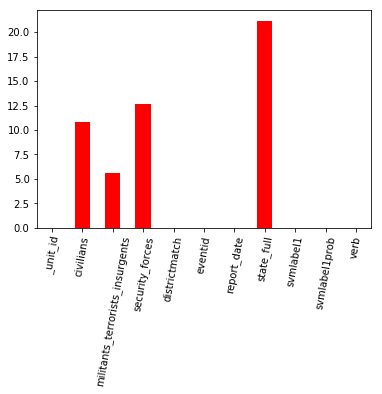

In [4]:
df_all_null.plot(kind="bar",color="red",rot=80)

## Filling missing values

In [5]:
data.to_csv("preprocessed.csv")

In [6]:
# Fill state_full column
print("Filling state_full column...")
data['state_full'].fillna('NA', inplace=False)
print("Filling state_full column...completed")



data = data.dropna(axis = 0, how ='any') 

Filling state_full column...
Filling state_full column...completed


# Computing null after dropping

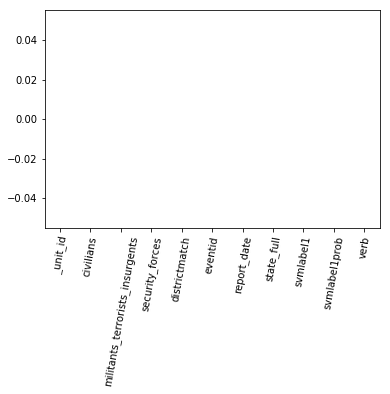

In [7]:
# Compute Null percentage of each feature.
df_all_null = (data.isnull().sum() / data.shape[0]) * 100
#df_all_null = (df_all.isnull().sum())
df_all_null[df_all_null > 0]
df_all_null.plot(kind="bar",color="red",rot=80)

## Data Transformation

In [8]:
data['report_date'] = pd.to_datetime(data.report_date)
#converting into Standard date format Y-M-D
data['report_date'] = pd.to_datetime(data['report_date'], format='%Y-%m-%d')

## Data addition

In [9]:
#adding new columns
data['attack_month'] = data['report_date'].dt.month
data['attack_day'] = data['report_date'].dt.day

In [10]:
data.drop('report_date',axis = 1, inplace = True)

## Data transformation

In [11]:
#replacing similar data of the attribute
replaceVerb=data['verb']
import re

for var in replaceVerb:
    if(re.search("killing",str(var)) or re.search("kill",str(var))):
        var2='killed'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("arresting",str(var)) or re.search("arrest",str(var))):
        var2='arrested'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("surrender",str(var)) or re.search("surrendering",str(var))):
        var2='surrendered'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("injuring",str(var)) or re.search("injure",str(var))):
        var2='injured'
        data['verb'].replace(var,var2,inplace=True)

## One Hot Encoding 

In [12]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:4] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = ['state_full','svmlabel1','districtmatch']

for column in columns_to_convert:
    data = convert_to_binary(data,column)
    data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...completed")

One Hot Encoding categorical data...
One Hot Encoding categorical data...completed


In [13]:
#to find total number of deaths based on profession 
security=data['svml_security'].sum()

terrorist=data['svml_terrorist'].sum()

civilian=data['svml_civilian'].sum()

public=data['svml_public'].sum()

private=data['svml_private'].sum()


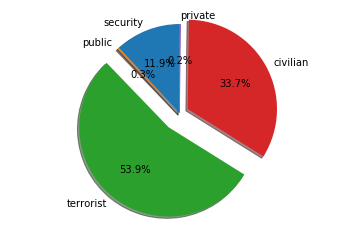

In [14]:
# Pie chart
labels = 'security','public', 'terrorist', 'civilian' ,'private'
sizes = [security,public,terrorist,civilian,private]
explode = (0, 0, 0.2, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [15]:
#from above pie cart we can say that major part of killed were terrorists

## Save Preprocessed Data to csv file

In [16]:
file4 = 'ppppreprocessed.csv'
data.to_csv(file4)

In [17]:
#create data frame for classification

df_all =  pd.DataFrame(data=data)

## Split preprocessed data into train data and test data

In [18]:
df_train = df_all.head(22000)
df_test = df_all.tail(5000)
df_all1 = df_all

In [19]:
#dropping column which we want to predivt from test data
df_test.drop('verb',axis = 1, inplace = True)

/home/shashwat/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
df_all.drop('verb',axis = 1, inplace = True)

In [21]:
#temporary variables
df_train1 = df_train
df_test1 = df_test
df_all1 = df_all

In [22]:
df_train1.columns

Index(['_unit_id', 'civilians', 'militants_terrorists_insurgents',
       'security_forces', 'eventid', 'svmlabel1prob', 'verb', 'attack_month',
       'attack_day', 'stat_jammu_and_',
       ...
       'dist_bilaspur', 'dist_longleng', 'dist_malappuram', 'dist_barwani',
       'dist_maharajgan', 'dist_kollam', 'dist_west_medin', 'dist_sikar',
       'dist_pathankot', 'dist_gautambudh'],
      dtype='object', length=448)

In [23]:
df_train['verb'].head()

0      killed
1      killed
5      killed
6     injured
10     killed
Name: verb, dtype: object

In [24]:
df_test1.columns

Index(['_unit_id', 'civilians', 'militants_terrorists_insurgents',
       'security_forces', 'eventid', 'svmlabel1prob', 'attack_month',
       'attack_day', 'stat_jammu_and_', 'stat_assam',
       ...
       'dist_bilaspur', 'dist_longleng', 'dist_malappuram', 'dist_barwani',
       'dist_maharajgan', 'dist_kollam', 'dist_west_medin', 'dist_sikar',
       'dist_pathankot', 'dist_gautambudh'],
      dtype='object', length=447)

In [25]:
df_all.columns

Index(['_unit_id', 'civilians', 'militants_terrorists_insurgents',
       'security_forces', 'eventid', 'svmlabel1prob', 'attack_month',
       'attack_day', 'stat_jammu_and_', 'stat_assam',
       ...
       'dist_bilaspur', 'dist_longleng', 'dist_malappuram', 'dist_barwani',
       'dist_maharajgan', 'dist_kollam', 'dist_west_medin', 'dist_sikar',
       'dist_pathankot', 'dist_gautambudh'],
      dtype='object', length=447)

In [26]:
#seeting _unit_id as a index of dataframe
df_train1.set_index('_unit_id', inplace=True)


## Label Encoding for Categorical data

In [27]:
from sklearn.preprocessing import LabelEncoder

id_train = df_train1.index.values
labels = df_train1['verb']

# Label encoding for the categorical data eg: ...NDF -> 7, US -> 10...
le = LabelEncoder()
y = le.fit_transform(labels)
X = df_train1.drop('verb', axis=1, inplace=False)

In [28]:
X.shape

(18277, 446)

In [29]:
X.head()

civilians  militants_terrorists_insurgents  security_forces  \
_unit_id                                                                 
711601341        0.0                              3.0              1.0   
711601342        0.0                              7.0              0.0   
711601346        0.0                              1.0              0.0   
711601347        0.0                              0.0              1.0   
711601351        1.0                              0.0              8.0   

           eventid  svmlabel1prob  attack_month  attack_day  stat_jammu_and_  \
_unit_id                                                                       
711601341        3       0.997059             3           7                1   
711601342        4       0.979219             3           7                1   
711601346       46       0.522630             3           8                0   
711601347       52       0.844207             3           9                0   
711601351      135       0.997681             3          13                0   

           stat_assam  stat_manipur       ...         dist_bilaspur  \
_unit_id                                  ...                         
711601341           0             0       ...                     0   
711601342           0             0       ...                     0   
711601346           1             0       ...                     0   
711601347           0             1       ...                     0   
711601351           0             0       ...                     0   

           dist_longleng  dist_malappuram  dist_barwani  dist_maharajgan  \
_unit_id                                                                   
711601341              0                0             0                0   
711601342              0                0             0                0   
711601346              0                0             0                0   
711601347              0                0             0                0   
711601351              0                0             0                0   

           dist_kollam  dist_west_medin  dist_sikar  dist_pathankot  \
_unit_id                                                              
711601341            0                0           0               0   
711601342            0                0           0               0   
711601346            0                0           0               0   
711601347            0                0           0               0   
711601351            0                0           0               0   

           dist_gautambudh  
_unit_id                    
711601341                0  
711601342                0  
711601346                0  
711601347                0  
711601351                0  

[5 rows x 446 columns]

In [30]:
from sklearn.model_selection import train_test_split
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
model_outputs = {}

# Gradient Boosting

In [32]:
clf = GradientBoostingClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Gradient_Boosting'] = accuracy

Accuracy: 67.30%


## Decission tree Classifier

In [33]:
clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Decission_tree'] = accuracy

Accuracy: 60.47%


## Gaussian Naive Bayes Classifier

In [34]:
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Gaussian_Naive_Bayes'] = accuracy

Accuracy: 43.84%


## SVM Classifier

In [35]:
clf = SVC(kernel="rbf") 
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['SVM'] = accuracy

Accuracy: 54.83%


# Linear SVM

In [36]:
clf = LinearSVC()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Linear_SVM'] = accuracy

Accuracy: 38.06%


# Random Forest classifier

In [37]:
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Random_Forest'] = accuracy

Accuracy: 65.32%


# Logistic Regression

In [38]:
clf = LogisticRegression()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Logistic_Regression'] = accuracy

Accuracy: 56.86%


# K Nearest Neighbours

In [39]:
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['KNN'] = accuracy

Accuracy: 50.95%


# Bagging Classifier

In [40]:
clf = BaggingClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Bagging'] = accuracy

Accuracy: 65.50%


# Extra Trees Classifier

In [41]:
clf = ExtraTreesClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Extraa_Tree'] = accuracy

Accuracy: 62.55%


# Isolation Forest

In [42]:
clf = IsolationForest()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Isolation_Forest'] = accuracy

Accuracy: 9.56%


# ADA Boosting

In [43]:
clf = AdaBoostClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Ada_Boosting'] = accuracy

Accuracy: 60.27%


# Nearest Centroid

In [44]:
clf = NearestCentroid()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Nearest_Centroid'] = accuracy

Accuracy: 29.34%


# Gaussian Process classifier

In [46]:
clf = GaussianProcessClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Gaussian_Process_Classifier'] = accuracy

KeyboardInterrupt: 

# Dummy Classifier

In [45]:
clf = DummyClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
accuracy = accuracy_score(labels_test , prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
model_outputs['Dummy_Classifier'] = accuracy

Accuracy: 33.22%


# Potting the model Accuracies

{'Gradient_Boosting': 0.6730488694383662, 'Decission_tree': 0.6046681254558717, 'Gaussian_Naive_Bayes': 0.43836615609044494, 'SVM': 0.5483223924142961, 'Linear_SVM': 0.38056163384390956, 'Random_Forest': 0.6531728665207878, 'Logistic_Regression': 0.5685630926331146, 'KNN': 0.5094821298322393, 'Bagging': 0.6549963530269876, 'Extraa_Tree': 0.6254558716265499, 'Isolation_Forest': 0.09555069292487235, 'Ada_Boosting': 0.6026622902990518, 'Nearest_Centroid': 0.2933989788475565, 'Dummy_Classifier': 0.3322392414296134}


[]

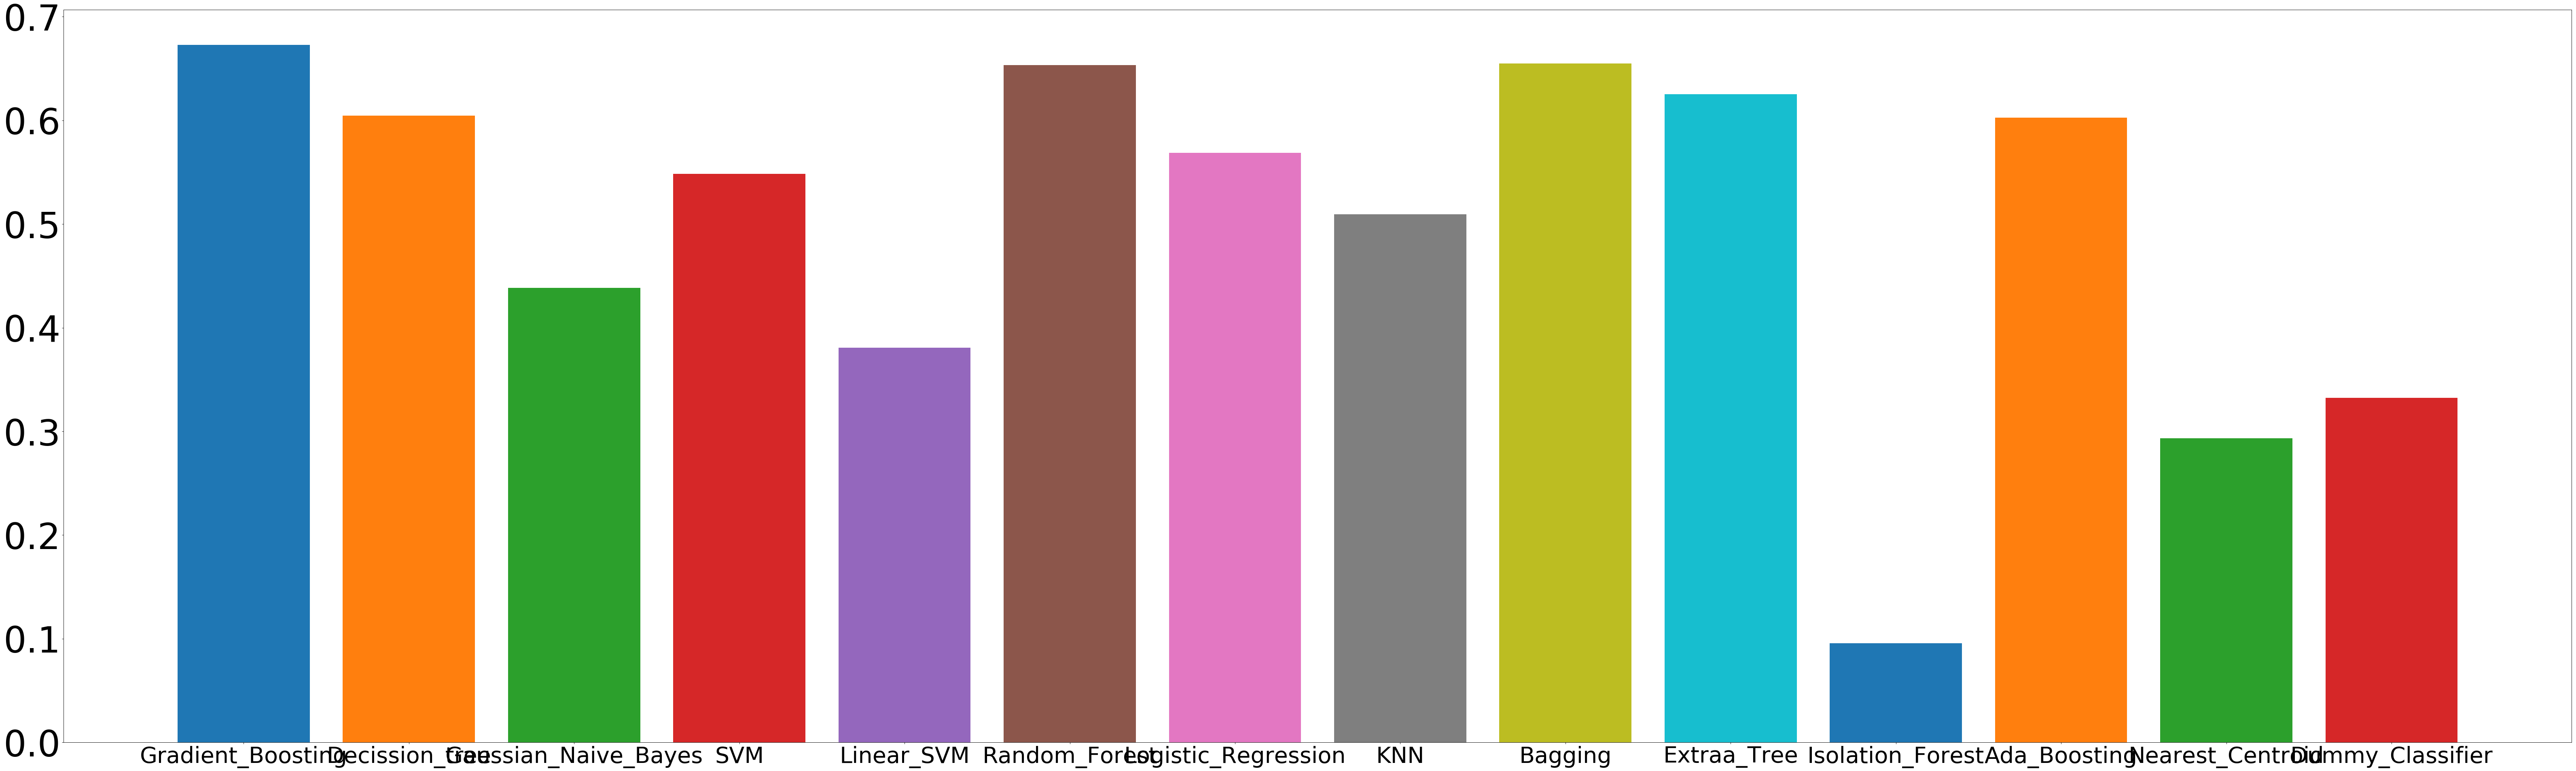

In [58]:
print(model_outputs)
import matplotlib.pyplot as plt
names = list(model_outputs.keys())
values = list(model_outputs.values())
'''plt.bar(
    range(len(model_outputs)), 
    values,
    tick_labels=names
#    align='center'
)
#plt.xticks(range(len(model_outputs)), list(model_outputs.keys()))
plt.show()'''
plt.figure(figsize(100,30), dpi=80)
import matplotlib
matplotlib.rc('xtick',labelsize=50)
matplotlib.rc('ytick',labelsize=80)
for i in range(len(names)):
    plt.bar(i,values[i],tick_label=names[i])
plt.xticks(range(len(names)), names)
plt.plot()

# Approach 2

## All At once

In [ ]:
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.dummy import *
from sklearn.tree import *
from sklearn.gaussian_process import *
from sklearn.metrics import accuracy_score

ensembles = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    IsolationForest(),
    RandomForestClassifier()
]

neighbors = [
    KNeighborsClassifier(),
    RadiusNeighborsClassifier(),
    NearestCentroid()
]

svms = [
    LinearSVC(),
    #NuSVC(),
    SVC(),
]

trees = [
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
]

extraa = [
    DummyClassifier(),
    GaussianProcessClassifier()
]

models = []
models.extend(ensembles)
models.extend(neighbors)
models.extend(svms)
models.extend(trees)
models.extend(extraa)
for model in models:
    try:
        print("---------------------------------------------------------------")
        print(str(model))
        print("---------------------------------------------------------------")
        file = open("Model_output_logger.txt", "a")
        model.fit(features_train, labels_train)
        prediction = model.predict(features_test)
        ## Computing accuracy
        accuracy = accuracy_score(labels_test , prediction)
        print("Accuracy: %.2f%%\n\n\n\n\n\n" % (accuracy * 100.0))
        file.write("model : " + str(model) + "\n accuracy : " + str(accuracy * 100.0) + "\n\n")
        file.close()
    except:
        print("\n\nerror in")
        print(model)